9658.322106272495 185.57050376291966
2025-03-31T00:53:09.927


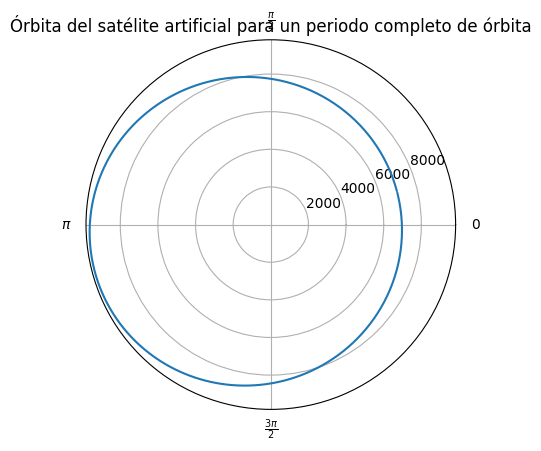

In [12]:
#newton raphson:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import astropy.units as u


#constantes
GM=398600.4405 #km^3/s^2
e=0.16561
w=15*(np.pi/180)
r_t=6378.137#km
a=1.30262*r_t
t_p=Time("2025-03-31T00:00:00",scale='utc')
N=500

#Funciones usadas para Newton-Raphsod
def l(t):
  return np.sqrt((GM)/(a**3))*((t-t_p).to_value('sec'))

def f_E(E,t):
  return E-e*np.sin(E)-l(t)

def deriv_f_E(E):
  return 1-e*np.cos(E)

#Implementación de Newton Raphsod
def NR_roots(x_i,f,df):
  x_g=x_i
  while abs(f(x_g)-0)>1e-12:
    step=-(f(x_g)/df(x_g))
    x_g=x_g+step
  return x_g

#funciones para E,f, y r dependientes del tiempo
def E(t):
  g_E = lambda E_g: f_E(E_g, t)
  return NR_roots(l(t), g_E, deriv_f_E)

def f(t):
  return 2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E(t)/2))

def phi(t):
  return f(t)+w

def r(t):
  return (a*(1-e**2))/(1+e*np.cos(f(t)))

def position(t):
  return(r(t),phi(t)*(180/np.pi))

#función para graficar la órbita en un periodo completo
def arrays(r_v,phi_v,dt):
    for i in range(N):
     r_v[i]=r(t_p+i*dt*u.second)
     phi_v[i]=phi(t_p+i*dt*u.second)

def orbit():
  #periodo orbital
  T=2*np.pi*np.sqrt((a**3)/GM)

  r_v=np.zeros(N)
  phi_v=np.zeros(N)
  dt=T/N

  arrays(r_v,phi_v,dt)

  #gráfica
  fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
  ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
  ax.set_xticklabels(["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$"])
  ax.plot(phi_v, r_v, label="Órbita elíptica")
  ax.set_title("Órbita del satélite artificial para un periodo completo de órbita")
  plt.show()



def linearInterpolation(x1, x2, y1, y2, y): #alterada para encontrar el x en vez del y
    x = x1 + ((x2-x1)/(y2-y1))*(y-y1)
    return x

#funcion para hallar la fecha en la que la orbita tiene un radio seleccionado
def date(r_0):
  perigeo=a*(1-e)
  apogeo=a*(1+e)

  if perigeo<=r_0<=apogeo:
      T=2*np.pi*np.sqrt((a**3)/GM)

      r_v=np.zeros(N)
      phi_v=np.zeros(N)
      dt=T/N
      arrays(r_v,phi_v,dt)
      t_0=0

      for i in range(N-1):
        if r_v[i]<r_0<r_v[i+1]:
          t_0=t_p+linearInterpolation(i*dt,(i+1)*dt,r_v[i],r_v[i+1],r_0)*u.second
          return(t_0)
          break
  else:
    return("la órbita no alcanza ese radio para ningún punto en el tiempo")



t=Time("2025-04-01T00:00:00", scale='utc') #fecha en la que se quiere saber r y phi
r_0=1.5*r_t

print(position(t)[0],position(t)[1])
print(date(r_0))
orbit()






365.12501157407405
